In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

/home/abigeard/.cache/pypoetry/virtualenvs/deepgenerativemodelsccs-wseG1uU7-py3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# filename = "/home/abigeard/RA_CCS/DeepGenerativeModelsCCS/data/observations64.hdf5"
filename = "/home/abigeard/RA_CCS/DeepGenerativeModelsCCS/data/surfaces_multipleobs.hdf5"
with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array

Keys: <KeysViewHDF5 ['X']>
<class 'h5py._hl.dataset.Dataset'>


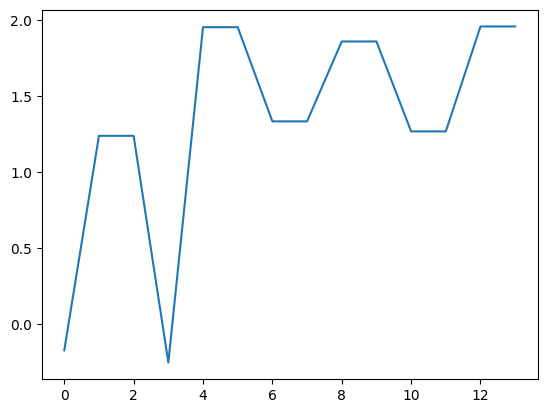

In [40]:
test = data2[1].reshape(10,2,64)
test = torch.Tensor(test)
nonzero = torch.where(test>0)
# nonzero = nonzero[0].unique(),nonzero[1].unique(),nonzero[2].unique()
points = test[nonzero[0], :, nonzero[2]][:,1]
plt.plot(points)

In [11]:
trans = nn.Transformer(d_model=64)
lstm = nn.LSTM(input_size = 64, hidden_size=128)

In [12]:
a = torch.Tensor(data2[0][:13])
b = torch.Tensor(data2[0][18:20])
# trans(a, b).shape
lstm(a)[0].shape

torch.Size([13, 128])